### 6.3.2 데이터 훑어보기

In [1]:
import pandas as pd
import numpy as np

data_path = '/kaggle/input/bike-sharing-demand/'

train=pd.read_csv(data_path + 'train.csv')

In [2]:
test = pd.read_csv(data_path + 'test.csv')
submission = pd.read_csv(data_path + 'sampleSubmission.csv')

In [3]:
train.shape, test.shape

((10886, 12), (6493, 9))

In [4]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [5]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [6]:
submission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   season      6493 non-null   int64  
 2   holiday     6493 non-null   int64  
 3   workingday  6493 non-null   int64  
 4   weather     6493 non-null   int64  
 5   temp        6493 non-null   float64
 6   atemp       6493 non-null   float64
 7   humidity    6493 non-null   int64  
 8   windspeed   6493 non-null   float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.7+ KB


### 6.3.3 더 표과적인 분석을 위한 피처 엔지니어링

In [9]:
print(train['datetime'][100]) # datetime 100번째 원소
print(train['datetime'][100].split())
print(train['datetime'][100].split()[0])
print(train['datetime'][100].split()[1])

2011-01-05 09:00:00
['2011-01-05', '09:00:00']
2011-01-05
09:00:00


In [10]:
%config Completer.use_jedi = False

In [11]:
train['date'] = train['datetime'].apply(lambda x: x.split()[0]) # 날짜 피처 생성

# 연도, 월, 일, 시, 분, 초 피처를 차례대로 생성
train['year'] = train['datetime'].apply(lambda x: x.split()[0].split('-')[0])
train['month'] = train['datetime'].apply(lambda x: x.split()[0].split('-')[1])
train['day'] = train['datetime'].apply(lambda x: x.split()[0].split('-')[2])
train['hour'] = train['datetime'].apply(lambda x: x.split()[1].split(':')[0])
train['minute'] = train['datetime'].apply(lambda x: x.split()[1].split(':')[1])
train['second'] = train['datetime'].apply(lambda x: x.split()[1].split(':')[2])

In [12]:
from datetime import datetime
import calendar

print(train['date'][100])
print(datetime.strptime(train['date'][100], '%Y-%m-%d')) # datetime 타입으로 변경
# 정수로 요일 반환
print(datetime.strptime(train['date'][100], '%Y-%m-%d').weekday())
# 문자열로 요일 반환
print(calendar.day_name[datetime.strptime(train['date'][100], '%Y-%m-%d').weekday()])

2011-01-05
2011-01-05 00:00:00
2
Wednesday


In [13]:
train['weekday'] = train['date'].apply(lambda dateString: calendar.day_name[datetime.strptime(dateString, '%Y-%m-%d').weekday()])

In [14]:
train['season'] = train['season'].map({1: 'Spring',
                                       2: 'Summer',
                                       3: 'Fall',
                                       4: 'Winter'})
train['weather'] = train['weather'].map({1: 'Clear',
                                         2: 'Mist, Few clouds',
                                         3: 'Light Snow, Rain, Thunderstorm',
                                         4: 'Heavy Rain, Thunderstorm, Snow, Fog'})

In [15]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,year,month,day,hour,minute,second,weekday
0,2011-01-01 00:00:00,Spring,0,0,Clear,9.84,14.395,81,0.0,3,13,16,2011-01-01,2011,01,01,00,00,00,Saturday
1,2011-01-01 01:00:00,Spring,0,0,Clear,9.02,13.635,80,0.0,8,32,40,2011-01-01,2011,01,01,01,00,00,Saturday
2,2011-01-01 02:00:00,Spring,0,0,Clear,9.02,13.635,80,0.0,5,27,32,2011-01-01,2011,01,01,02,00,00,Saturday
3,2011-01-01 03:00:00,Spring,0,0,Clear,9.84,14.395,75,0.0,3,10,13,2011-01-01,2011,01,01,03,00,00,Saturday
4,2011-01-01 04:00:00,Spring,0,0,Clear,9.84,14.395,75,0.0,0,1,1,2011-01-01,2011,01,01,04,00,00,Saturday


### 6.3.4 데이터 시각화

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

* 분포도  
분포도(distribution plot)는 수치형 데이터의 집계 값을 나타내는 그래프이다. 집계 값은 총 갯수나 비율 등을 의미한다.

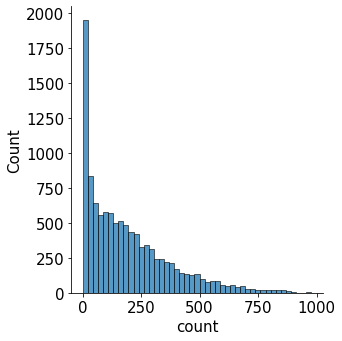

In [17]:
mpl.rc('font', size=15)
sns.displot(train['count'])

* 위 데이터처럼 데이터가 편향되어 있다면 로그변환을 이용한다. 회귀 모델이 좋은 성능을 나타내려면 정규분포를 따라는 형태가 가장 베스트하기 때문이다.

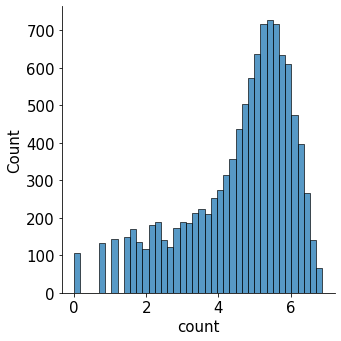

In [18]:
sns.displot(np.log(train['count']))

* 막대 그래프  
연도, 월, 일, 시, 분, 초별로 총 여섯 가지의 평균 대여 수량을 막대 그래프로 표현해보기. 범주형 데이터.

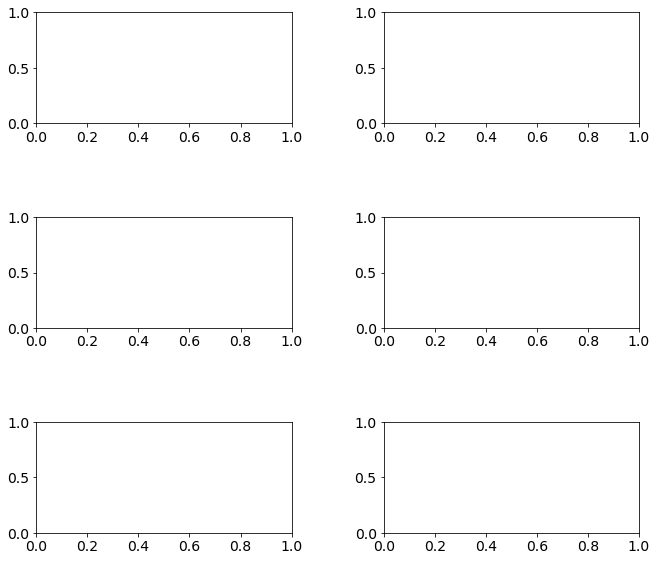

In [19]:
mpl.rc('font', size=14) # 폰트 크기 설정
mpl.rc('axes',titlesize=15) # 각 축의 제목 크기 설정
figure, axes = plt.subplots(nrows=3, ncols=2) #3행 2열 figure 생성
plt.tight_layout() # 그래프 사이에 여백 확보
figure.set_size_inches(10, 9) # 전체 Figure 크기를 10x9인치로 설정

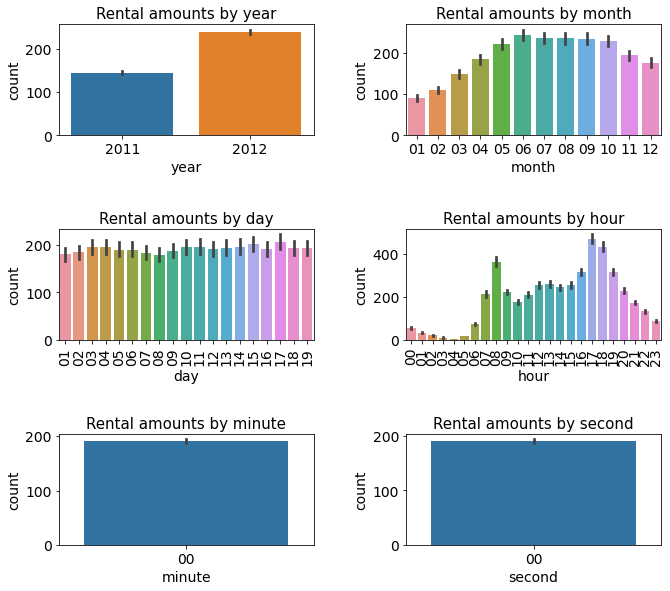

In [20]:
#스텝1: m행 n열 Figure 준비하기
mpl.rc('font', size=14) # 폰트 크기 설정
mpl.rc('axes',titlesize=15) # 각 축의 제목 크기 설정
figure, axes = plt.subplots(nrows=3, ncols=2) #3행 2열 figure 생성
plt.tight_layout() # 그래프 사이에 여백 확보
figure.set_size_inches(10, 9) # 전체 Figure 크기를 10x9인치로 설정

# 스텝2: 각 축에 서브플롯 할당
sns.barplot(x='year', y='count', data=train, ax=axes[0, 0])
sns.barplot(x='month', y='count', data=train, ax=axes[0, 1])
sns.barplot(x='day', y='count', data=train, ax=axes[1, 0])
sns.barplot(x='hour', y='count', data=train, ax=axes[1, 1])
sns.barplot(x='minute', y='count', data=train, ax=axes[2, 0])
sns.barplot(x='second', y='count', data=train, ax=axes[2, 1])

# 스텝3: (선택) 세부 설정
axes[0,0].set(title='Rental amounts by year')
axes[0,1].set(title='Rental amounts by month')
axes[1,0].set(title='Rental amounts by day')
axes[1,1].set(title='Rental amounts by hour')
axes[2,0].set(title='Rental amounts by minute')
axes[2,1].set(title='Rental amounts by second')

axes[1,0].tick_params(axis='x', labelrotation=90)
axes[1,1].tick_params(axis='x', labelrotation=90)

* 박스플롯  
박스플롯(box plot)은 범주형 데이터에 따른 수치형 데이터 정보를 나타내는 그래프이다. 막대 그래프보다 더 많은 정보를 제공하는 특징이 있다.

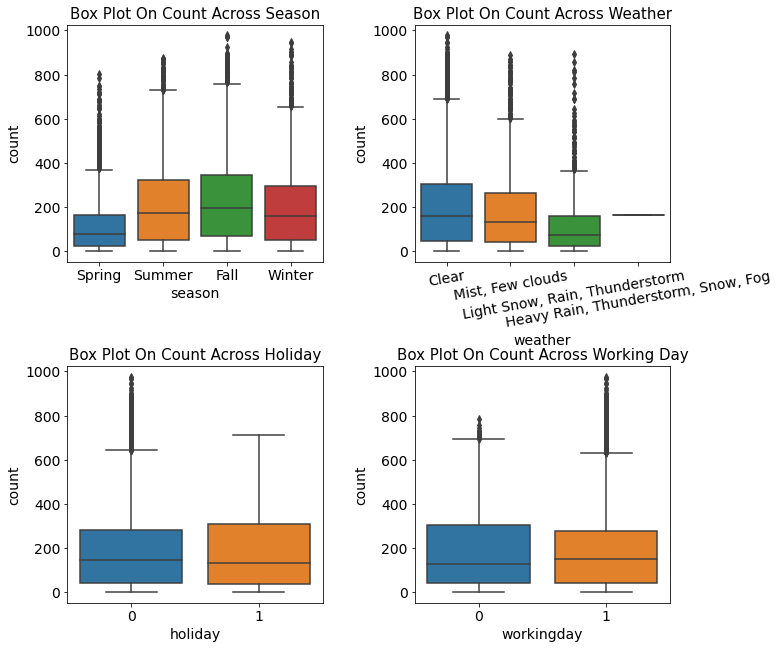

In [23]:
# 스텝1 : m형 n열 Figure 준비
figure, axes = plt.subplots(nrows=2, ncols=2)
plt.tight_layout()
figure.set_size_inches(10, 10)

# 스텝2 : 서브플롯 할당
# 계절, 날씨, 공휴일, 근무일별 대여 수량 박스플롯
sns.boxplot(x='season', y='count', data=train, ax=axes[0,0])
sns.boxplot(x='weather', y='count', data=train, ax=axes[0,1])
sns.boxplot(x='holiday', y='count', data=train, ax=axes[1,0])
sns.boxplot(x='workingday', y='count', data=train, ax=axes[1,1])

#스텝3 : 세부 설정
#3-1: 서브플롯에 제목 달기
axes[0, 0].set(title='Box Plot On Count Across Season')
axes[0, 1].set(title='Box Plot On Count Across Weather')
axes[1, 0].set(title='Box Plot On Count Across Holiday')
axes[1, 1].set(title='Box Plot On Count Across Working Day')

#3-2: x축 라벨 겹침 해결
axes[0,1].tick_params(axis='x', labelrotation=10)# 10도 회전

* 포인트 플롯  
근무일, 공휴일, 요일, 계절, 날씨에 따른 시간대별 평균 대여 수량을 포인트플롯으로 그려보기. 포인트플롯은 범주형 데이터에 따른 수치형 데이터의 평균과 신뢰구간을 점과 선으로 표시한다.

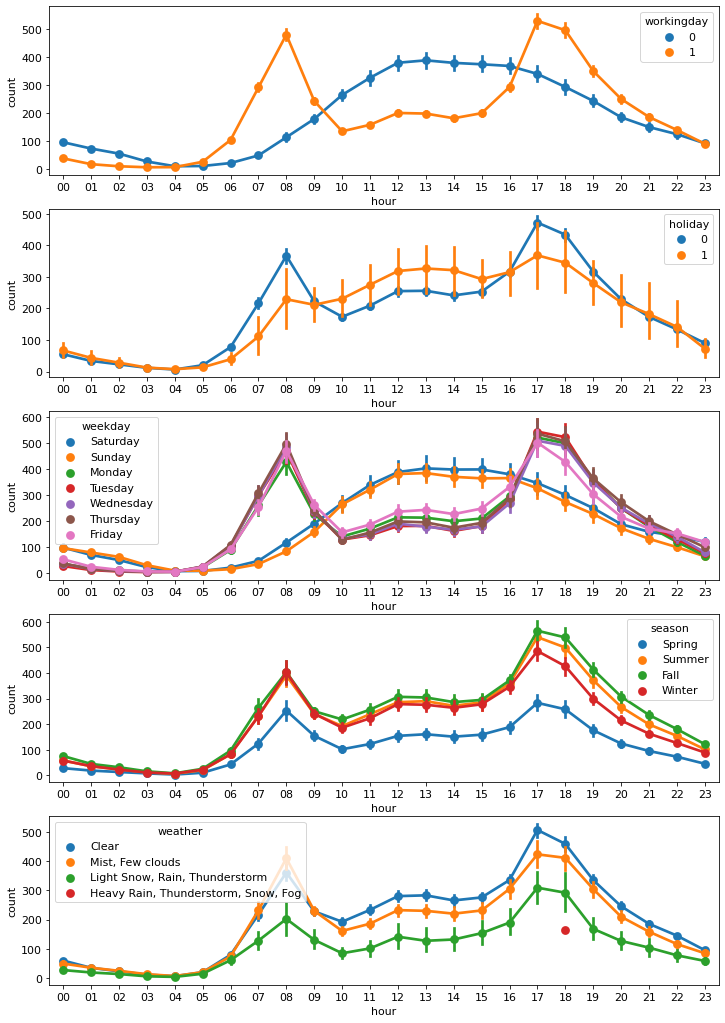

In [24]:
mpl.rc('font', size=11)
figure, axes = plt.subplots(nrows=5)
figure.set_size_inches(12, 18)

sns.pointplot(x='hour', y='count', data=train, hue='workingday', ax=axes[0])
sns.pointplot(x='hour', y='count', data=train, hue='holiday', ax=axes[1])
sns.pointplot(x='hour', y='count', data=train, hue='weekday', ax=axes[2])
sns.pointplot(x='hour', y='count', data=train, hue='season', ax=axes[3])
sns.pointplot(x='hour', y='count', data=train, hue='weather', ax=axes[4]);

* 회귀선을 포함한 산점도 그래프  
수치형 데이터인 온도, 체감 온도, 풍속, 습도별 대여 수량을 '회귀선을 포함한 산점도 그래프(scatter plot graph with regression line)로 그려보기.

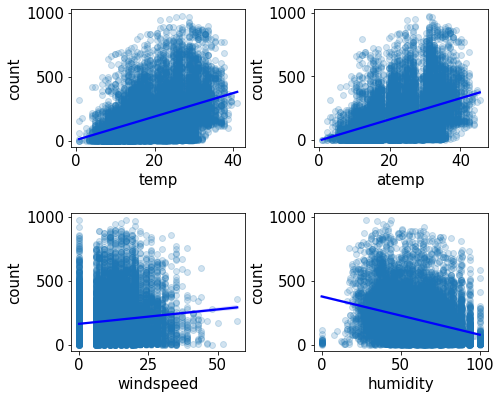

In [25]:
mpl.rc('font', size=15)
figure, axes = plt.subplots(nrows=2, ncols=2)
plt.tight_layout()
figure.set_size_inches(7, 6)

sns.regplot(x='temp', y='count', data=train, ax=axes[0,0], scatter_kws={'alpha': 0.2}, line_kws={'color': 'blue'})
sns.regplot(x='atemp', y='count', data=train, ax=axes[0,1], scatter_kws={'alpha': 0.2}, line_kws={'color': 'blue'})
sns.regplot(x='windspeed', y='count', data=train, ax=axes[1,0], scatter_kws={'alpha': 0.2}, line_kws={'color': 'blue'})
sns.regplot(x='humidity', y='count', data=train, ax=axes[1,1], scatter_kws={'alpha': 0.2}, line_kws={'color': 'blue'});

* 히트맵  
temp, atemp, humidity, windspeed, count는 수치형 데이터이다. 이 수치형 데이터끼리 어떤 상관관계가 있는지 보도록 하자.

In [26]:
train[['temp', 'atemp', 'humidity', 'windspeed', 'count']].corr()

,temp,atemp,humidity,windspeed,count
temp,1.000000,0.984948,-0.064949,-0.017852,0.394454
atemp,0.984948,1.000000,-0.043536,-0.057473,0.389784
humidity,-0.064949,-0.043536,1.000000,-0.318607,-0.317371
windspeed,-0.017852,-0.057473,-0.318607,1.000000,0.101369
count,0.394454,0.389784,-0.317371,0.101369,1.000000


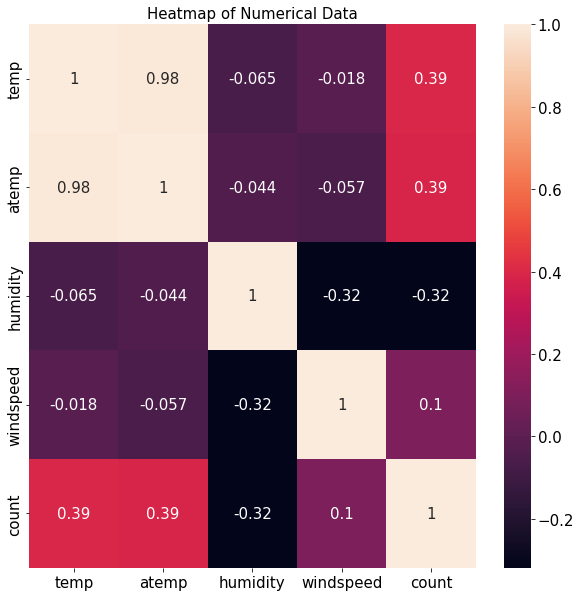

In [27]:
corrMat = train[['temp', 'atemp', 'humidity', 'windspeed', 'count']].corr()
fig, ax = plt.subplots()
fig.set_size_inches(10, 10)
sns.heatmap(corrMat, annot=True)
ax.set(title='Heatmap of Numerical Data');

**분석 정리**
* **타깃값 변환** 분포도 확인 결과 타깃값인 count가 0 근처로 치우쳐져 있으므로 로그변환하여 정규 분포에 가깝게 만들어야 한다. 타깃값을 count가 아닌 log(count)로 변환해 사용할 것이므로 마지막에 다시 지수변환해 count로 복원해야 한다.
* **파생 피처 추가** datetime 피처는 여러 가지 정보의 혼합체이므로 각각을 분리해 year, month, day, hour, minute, second 피처를 생성할 수 있다.
* **파생 피처 추가** datetime에 숨어 있는 또 다른 정보인 요일(weekday) 피처를 추가한다.
* **피처 제거** 테스트 데이터에 없는 피처는 훈련에 사용해도 큰 의미가 없다. 따라서 훈련 데이터에만 있는 casual과 registered 피처는 제거.
* **피처 제거** datetime 피처는 인덱스 역할만 하므로 타깃값 예측에 아무런 도움이 되지 않는다.
* **피처 제거** date 피처가 제공하는 정보는 year, month, day 피처에 담겨 있다.
* **피처 제거** month는 season 피처의 세부 분류로 볼 수 있다. 데이터가 지나치게 세분화되어 있으면 분류별 데이터 수가 적어서 오히려 학습에 방해가 되기도 한다.
* **피처 제거** 막대 그래프 확인 결과 파생 피처인 day는 분별력이 없었다.
* **피처 제거** 막대 그래프 확인 결과 파생 피처인 minute와 second에는 아무런 정보가 담겨 있지 않았다.
* **이상치 제거** 포인트 플롯 확인 결과 weather가 4인 데이터는 이상치였다.
* **피처 제거** 산점도 그래프와 히트맵 확인 결과 windspeed 피처에는 결측값이 많고 대여 수량과의 상관관계가 매우 약하다.